In [3]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import squarify

In [4]:
item_orders_dec = pd.read_csv("../../Data/train_before_dec.csv")
item_orders_dec["date"] = pd.to_datetime(item_orders_dec["date"])
item_orders_dec

,date,userID,itemID,order,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories,purchaseWeek
0,2020-06-01,38769,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]",1
1,2020-06-01,42535,30474,1,193,10,3,229,3,132,"[3459, 3738, 679, 1628, 4072]",1
2,2020-06-01,42535,15833,1,1318,4,1,455,0,108,"[2973, 2907, 2749, 3357]",1
3,2020-06-01,42535,20131,1,347,4,0,291,3,44,"[30, 1515, 1760, 2932, 1287, 2615, 3727, 2450,...",1
4,2020-06-01,42535,4325,1,539,6,0,303,0,45,"[3104, 1772, 2029, 1274, 3915, 888, 1118, 3882...",1
...,...,...,...,...,...,...,...,...,...,...,...,...
767126,2020-11-30,22541,746,1,406,10,0,503,0,17,"[3704, 2833, 146, 308, 3540, 2980, 1138]",0
767127,2020-11-30,36315,22834,20,993,10,3,515,0,190,[3916],0
767128,2020-11-30,7736,18630,3,6,4,0,291,0,44,"[2977, 30, 1515, 1760, 2932, 377, 3727, 747, 3...",0
767129,2020-11-30,7736,29657,8,18,10,0,345,0,84,"[1515, 2330, 1760, 3245, 2443, 3173, 3915, 391...",0


In [5]:
item_orders_jan = pd.read_csv("../../Data/train_before_jan.csv")
item_orders_jan["date"] = pd.to_datetime(item_orders_jan["date"])
item_orders_jan

,date,userID,itemID,order,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories,purchaseWeek
0,2020-06-01,38769,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]",1
1,2020-06-01,42535,30474,1,193,10,3,229,3,132,"[3459, 3738, 679, 1628, 4072]",1
2,2020-06-01,42535,15833,1,1318,4,1,455,0,108,"[2973, 2907, 2749, 3357]",1
3,2020-06-01,42535,20131,1,347,4,0,291,3,44,"[30, 1515, 1760, 2932, 1287, 2615, 3727, 2450,...",1
4,2020-06-01,42535,4325,1,539,6,0,303,0,45,"[3104, 1772, 2029, 1274, 3915, 888, 1118, 3882...",1
...,...,...,...,...,...,...,...,...,...,...,...,...
905876,2020-12-31,38399,32075,1,1111,4,0,25,3,45,"[1353, 545, 2373, 4196]",0
905877,2020-12-31,38399,23050,1,1411,4,0,22,0,151,"[545, 1763, 3912, 3300, 3586, 3914, 3915, 3962...",0
905878,2020-12-31,21613,25422,1,539,10,0,345,0,99,"[3245, 1182]",0
905879,2020-12-31,27030,52,1,799,10,1,358,0,99,[1403],0


In [8]:
item_orders_feb = pd.read_csv("../../Data/old/orders.csv", sep='|')
item_orders_feb["date"] = pd.to_datetime(item_orders_feb["date"])
item_orders_feb

,date,userID,itemID,order
0,2020-06-01,38769,3477,1
1,2020-06-01,42535,30474,1
2,2020-06-01,42535,15833,1
3,2020-06-01,42535,20131,1
4,2020-06-01,42535,4325,1
...,...,...,...,...
1071533,2021-01-31,22114,29567,2
1071534,2021-01-31,22114,21068,1
1071535,2021-01-31,10900,18270,1
1071536,2021-01-31,17894,31265,5


In [24]:
NOW = dt(2020, 12, 1)

features_dec = item_orders_dec.groupby("userID").agg({
    "date": lambda x: (NOW - x.max()).days,
    "itemID": "count",
    "order": ["mean", "sum"],
    }).reset_index()

features_dec.columns = ["userID", "recency", "frequency", "quantity_avg", "quantity_total"]
features_dec.tail()

,userID,recency,frequency,quantity_avg,quantity_total
45760,46133,9,21,1.095238,23
45761,46134,17,26,1.230769,32
45762,46135,18,6,1.666667,10
45763,46136,33,32,1.812500,58
45764,46137,75,5,1.400000,7


In [25]:
NOW = dt(2021, 1, 1)

features_jan = item_orders_jan.groupby("userID").agg({
    "date": lambda x: (NOW - x.max()).days,
    "itemID": "count",
    "order": ["mean", "sum"],
    }).reset_index()

features_jan.columns = ["userID", "recency", "frequency", "quantity_avg", "quantity_total"]
features_jan.tail()

,userID,recency,frequency,quantity_avg,quantity_total
46026,46133,40,21,1.095238,23
46027,46134,19,27,1.222222,33
46028,46135,25,7,1.857143,13
46029,46136,4,35,1.971429,69
46030,46137,106,5,1.400000,7


In [9]:
NOW = dt(2021, 2, 1)

features_feb = item_orders_feb.groupby("userID").agg({
    "date": lambda x: (NOW - x.max()).days,
    "itemID": "count",
    "order": ["mean", "sum"],
    }).reset_index()

features_feb.columns = ["userID", "recency", "frequency", "quantity_avg", "quantity_total"]
features_feb.tail()

,userID,recency,frequency,quantity_avg,quantity_total
46133,46133,18,25,1.080000,27
46134,46134,9,29,1.206897,35
46135,46135,56,7,1.857143,13
46136,46136,35,35,1.971429,69
46137,46137,1,10,1.200000,12


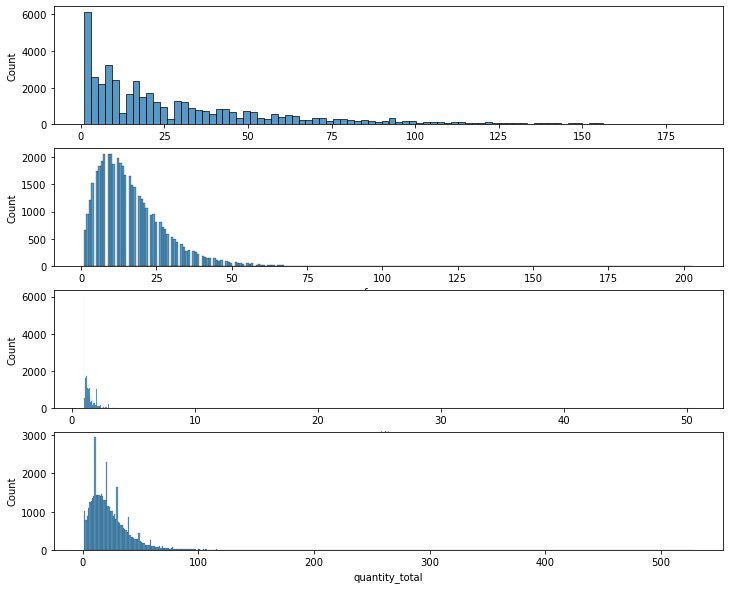

In [26]:
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1); sns.histplot(features_dec["recency"])

plt.subplot(4, 1, 2); sns.histplot(features_dec["frequency"])

plt.subplot(4, 1, 3); sns.histplot(features_dec["quantity_avg"])

plt.subplot(4, 1, 4); sns.histplot(features_dec["quantity_total"])

plt.show()

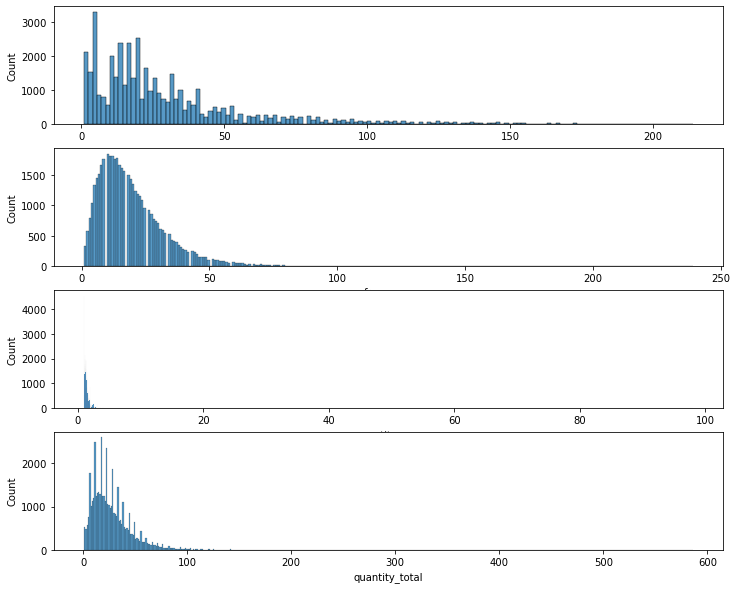

In [27]:
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1); sns.histplot(features_jan["recency"])

plt.subplot(4, 1, 2); sns.histplot(features_jan["frequency"])

plt.subplot(4, 1, 3); sns.histplot(features_jan["quantity_avg"])

plt.subplot(4, 1, 4); sns.histplot(features_jan["quantity_total"])

plt.show()

In [28]:
# Calculating R and F groups
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1)
f_labels = range(1, 5)

# Assign these labels to 4 equal percentile groups
r_groups = pd.qcut(features_dec["recency"], q=4, labels=r_labels)

# Assign these labels to 4 equal percentile groups
f_groups = pd.qcut(features_dec["frequency"], q=4, labels=f_labels)

# Create new columns
features_dec = features_dec.assign(R = r_groups.values, F=f_groups.values)

features_dec.head()

,userID,recency,frequency,quantity_avg,quantity_total,R,F
0,0,11,9,1.000000,9,3,2
1,1,2,10,1.300000,13,4,2
2,2,3,18,1.166667,21,4,3
3,3,10,31,1.290323,40,3,4
4,4,2,17,1.705882,29,4,3


In [29]:
# Calculating R and F groups
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1)
f_labels = range(1, 5)

# Assign these labels to 4 equal percentile groups
r_groups = pd.qcut(features_jan["recency"], q=4, labels=r_labels)

# Assign these labels to 4 equal percentile groups
f_groups = pd.qcut(features_jan["frequency"], q=4, labels=f_labels)

# Create new columns
features_jan = features_jan.assign(R = r_groups.values, F=f_groups.values)

features_jan.head()

,userID,recency,frequency,quantity_avg,quantity_total,R,F
0,0,21,14,1.000000,14,3,2
1,1,23,12,1.250000,15,2,2
2,2,13,20,1.200000,24,3,3
3,3,3,38,1.289474,49,4,4
4,4,33,17,1.705882,29,2,2


In [17]:
# Calculating R and F groups
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1)
f_labels = range(1, 5)

# Assign these labels to 4 equal percentile groups
r_groups = pd.qcut(features_feb["recency"], q=4, labels=r_labels)

# Assign these labels to 4 equal percentile groups
f_groups = pd.qcut(features_feb["frequency"], q=4, labels=f_labels)

# Create new columns
features_feb = features_feb.assign(R = r_groups.values, F=f_groups.values)

features_jan.head()

,userID,recency,frequency,quantity_avg,quantity_total,R,F
0,0,7,18,1.111111,20,4,2
1,1,16,15,1.200000,18,3,2
2,2,7,21,1.190476,25,4,3
3,3,4,40,1.350000,54,4,4
4,4,3,23,1.695652,39,4,3


In [30]:
features_dec["RF_Segment_Concat"] = features_dec["R"].astype(str) + features_dec["F"].astype(str)
features_dec.head()

,userID,recency,frequency,quantity_avg,quantity_total,R,F,RF_Segment_Concat
0,0,11,9,1.000000,9,3,2,32
1,1,2,10,1.300000,13,4,2,42
2,2,3,18,1.166667,21,4,3,43
3,3,10,31,1.290323,40,3,4,34
4,4,2,17,1.705882,29,4,3,43


In [31]:
features_jan["RF_Segment_Concat"] = features_jan["R"].astype(str) + features_jan["F"].astype(str)
features_jan.head()

,userID,recency,frequency,quantity_avg,quantity_total,R,F,RF_Segment_Concat
0,0,21,14,1.000000,14,3,2,32
1,1,23,12,1.250000,15,2,2,22
2,2,13,20,1.200000,24,3,3,33
3,3,3,38,1.289474,49,4,4,44
4,4,33,17,1.705882,29,2,2,22


In [ ]:
features_feb["RF_Segment_Concat"] = features_feb["R"].astype(str) + features_feb["F"].astype(str)
features_feb.head()

In [32]:
# Count the num of unique segments
print(features_dec.groupby("RF_Segment_Concat")["RF_Segment_Concat"].nunique().sum())

# Calculate RF score
features_dec["RF_Score"] = features_dec[["R", "F"]].sum(axis=1)
features_dec.head()

16


,userID,recency,frequency,quantity_avg,quantity_total,R,F,RF_Segment_Concat,RF_Score
0,0,11,9,1.000000,9,3,2,32,5
1,1,2,10,1.300000,13,4,2,42,6
2,2,3,18,1.166667,21,4,3,43,7
3,3,10,31,1.290323,40,3,4,34,7
4,4,2,17,1.705882,29,4,3,43,7


In [33]:
# Count the num of unique segments
print(features_jan.groupby("RF_Segment_Concat")["RF_Segment_Concat"].nunique().sum())

# Calculate RF score
features_jan["RF_Score"] = features_jan[["R", "F"]].sum(axis=1)
features_jan.head()

16


,userID,recency,frequency,quantity_avg,quantity_total,R,F,RF_Segment_Concat,RF_Score
0,0,21,14,1.000000,14,3,2,32,5
1,1,23,12,1.250000,15,2,2,22,4
2,2,13,20,1.200000,24,3,3,33,6
3,3,3,38,1.289474,49,4,4,44,8
4,4,33,17,1.705882,29,2,2,22,4


In [18]:
# Count the num of unique segments
print(features_feb.groupby("RF_Segment_Concat")["RF_Segment_Concat"].nunique().sum())

# Calculate RF score
features_feb["RF_Score"] = features_feb[["R", "F"]].sum(axis=1)
features_feb.head()

16


,userID,recency,frequency,quantity_avg,quantity_total,R,F,RF_Segment_Concat,RF_Score,RF_Level
0,0,7,18,1.111111,20,4,2,42,6,Loyal
1,1,16,15,1.200000,18,3,2,32,5,Loyal
2,2,7,21,1.190476,25,4,3,43,7,Champions
3,3,4,40,1.350000,54,4,4,44,8,Champions
4,4,3,23,1.695652,39,4,3,43,7,Champions


In [19]:
# Define customer segment
def rf_level(df):
    if df["RF_Score"] > 6:
        return "Champions"
    elif df["RF_Score"] > 4:
        return "Loyal"
    elif df["RF_Score"] > 2:
        return "Promising"
    else:
        return "Low"

In [35]:
# Create new column RF_Level
features_dec["RF_Level"] = features_dec.apply(rf_level, axis=1)
features_dec.head()

,userID,recency,frequency,quantity_avg,quantity_total,R,F,RF_Segment_Concat,RF_Score,RF_Level
0,0,11,9,1.000000,9,3,2,32,5,Loyal
1,1,2,10,1.300000,13,4,2,42,6,Loyal
2,2,3,18,1.166667,21,4,3,43,7,Champions
3,3,10,31,1.290323,40,3,4,34,7,Champions
4,4,2,17,1.705882,29,4,3,43,7,Champions


In [36]:
# Create new column RF_Level
features_jan["RF_Level"] = features_jan.apply(rf_level, axis=1)
features_jan.head()

,userID,recency,frequency,quantity_avg,quantity_total,R,F,RF_Segment_Concat,RF_Score,RF_Level
0,0,21,14,1.000000,14,3,2,32,5,Loyal
1,1,23,12,1.250000,15,2,2,22,4,Promising
2,2,13,20,1.200000,24,3,3,33,6,Loyal
3,3,3,38,1.289474,49,4,4,44,8,Champions
4,4,33,17,1.705882,29,2,2,22,4,Promising


In [20]:
# Create new column RF_Level
features_feb["RF_Level"] = features_feb.apply(rf_level, axis=1)
features_feb.head()

,userID,recency,frequency,quantity_avg,quantity_total,R,F,RF_Segment_Concat,RF_Score,RF_Level
0,0,7,18,1.111111,20,4,2,42,6,Loyal
1,1,16,15,1.200000,18,3,2,32,5,Loyal
2,2,7,21,1.190476,25,4,3,43,7,Champions
3,3,4,40,1.350000,54,4,4,44,8,Champions
4,4,3,23,1.695652,39,4,3,43,7,Champions


In [37]:
features_dec_agg = features_dec.groupby("RF_Level").agg({
    "recency": "mean",
    "frequency": ["mean", "count"],
}).round(1)

features_dec_agg.columns = ["Recency_Mean", "Frequency_Mean", "Count"]
features_dec_agg

,Recency_Mean,Frequency_Mean,Count
RF_Level,,,
Champions,6.9,29.7,11776
Low,93.1,4.7,5874
Loyal,18.8,16.8,15842
Promising,45.2,10.1,12273


In [38]:
features_jan_agg = features_jan.groupby("RF_Level").agg({
    "recency": "mean",
    "frequency": ["mean", "count"],
}).round(1)

features_jan_agg.columns = ["Recency_Mean", "Frequency_Mean", "Count"]
features_jan_agg

,Recency_Mean,Frequency_Mean,Count
RF_Level,,,
Champions,9.1,34.6,11125
Low,90.7,6.1,5711
Loyal,19.4,20.0,16251
Promising,41.9,12.4,12944


In [21]:
features_feb_agg = features_feb.groupby("RF_Level").agg({
    "recency": "mean",
    "frequency": ["mean", "count"],
}).round(1)

features_feb_agg.columns = ["Recency_Mean", "Frequency_Mean", "Count"]
features_feb_agg

,Recency_Mean,Frequency_Mean,Count
RF_Level,,,
Champions,6.3,40.4,11229
Low,82.8,7.6,5578
Loyal,16.0,23.7,16158
Promising,37.8,14.6,13173


[]

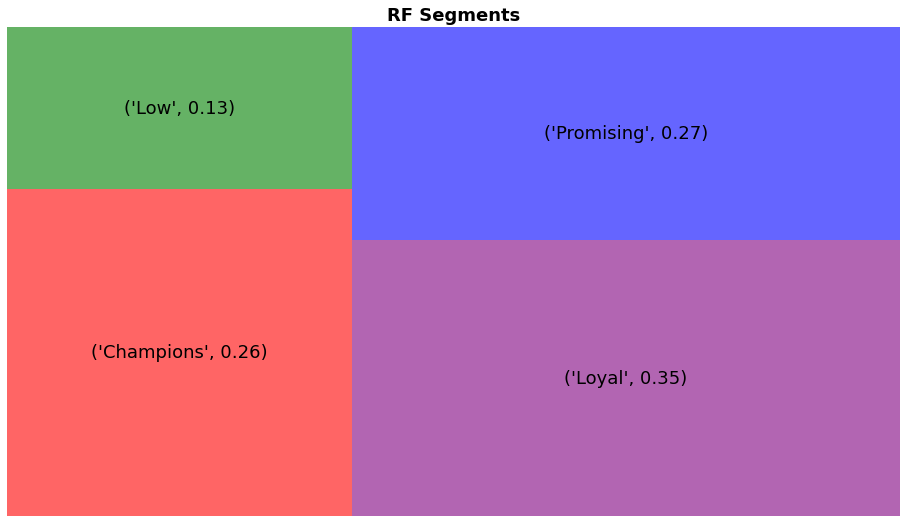

In [39]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)

labels = zip(features_dec_agg.index, np.round(features_dec_agg["Count"].values / features_dec_agg["Count"].sum(),2))
squarify.plot(sizes=features_dec_agg["Count"],
            label=labels, 
            color =["red", "green", "purple", "blue"],
            alpha=.6,
            text_kwargs={"fontsize":18})

plt.title("RF Segments", fontsize=18, fontweight="bold")
plt.axis("off")
plt.plot()

[]

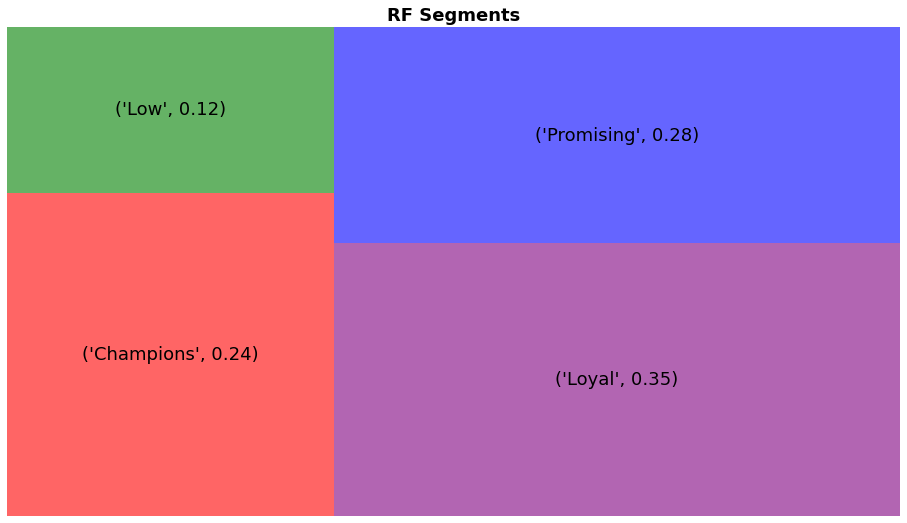

In [40]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)

labels = zip(features_jan_agg.index, np.round(features_jan_agg["Count"].values / features_jan_agg["Count"].sum(),2))
squarify.plot(sizes=features_jan_agg["Count"],
            label=labels, 
            color =["red", "green", "purple", "blue"],
            alpha=.6,
            text_kwargs={"fontsize":18})

plt.title("RF Segments", fontsize=18, fontweight="bold")
plt.axis("off")
plt.plot()

In [47]:
features_dec["RF_Level"] = features_dec["RF_Level"].replace("Champions", 3)
features_dec["RF_Level"] = features_dec["RF_Level"].replace("Loyal", 2)
features_dec["RF_Level"] = features_dec["RF_Level"].replace("Promising", 1)
features_dec["RF_Level"] = features_dec["RF_Level"].replace("Low", 0)
features_dec.to_csv("../../Data/Feature CSVs/rfm_analysis_dec.csv", index=False)

In [48]:
features_jan["RF_Level"] = features_jan["RF_Level"].replace("Champions", 3)
features_jan["RF_Level"] = features_jan["RF_Level"].replace("Loyal", 2)
features_jan["RF_Level"] = features_jan["RF_Level"].replace("Promising", 1)
features_jan["RF_Level"] = features_jan["RF_Level"].replace("Low", 0)
features_jan.to_csv("../../Data/Feature CSVs/rfm_analysis_jan.csv", index=False)

In [22]:
features_feb["RF_Level"] = features_feb["RF_Level"].replace("Champions", 3)
features_feb["RF_Level"] = features_feb["RF_Level"].replace("Loyal", 2)
features_feb["RF_Level"] = features_feb["RF_Level"].replace("Promising", 1)
features_feb["RF_Level"] = features_feb["RF_Level"].replace("Low", 0)
features_feb.to_csv("../../Data/Feature CSVs/rfm_analysis_feb.csv", index=False)